In [17]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [35]:
# Immports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scikitplot as skplt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

### Import data from Kaggle

In [19]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data.shape

(42000, 785)

### Split the Data

In [21]:
# Convert pandas data frame to numpy array
data = np.array(data)
np.random.shuffle(data)

# get the shape of our data
rows, cols = data.shape
# take the first 1k examples and transpose them
# so we end up with an example per column
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:cols]
X_dev = X_dev / 255.

data_train = data[1000:rows].T
Y_train = data_train[0]
X_train = data_train[1:cols]
X_train = X_train / 255.


In [22]:
Y_train

array([7, 7, 3, ..., 6, 9, 6])

In [23]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
X_train[:, 0].shape

(784,)

## crafting the NN

In [25]:
# Initialize the parameters
def init_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# iterate through the elements (if Z > 0 -> Z else 0)
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / rows * dZ2.dot(A1.T)
    db2 = 1 / rows * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / rows * dZ1.dot(X.T)
    db1 = 1 / rows * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
    

In [26]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
#     print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    acc_history = []
    W1, b1, W2, b2 = init_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        predictions = get_predictions(A2)
        acc_history.append(get_accuracy(predictions, Y))
        if i % 50 == 0:
            print("Iteration: ", i)
            print("Acc: ", acc_history[-1])
    return W1, b1, W2, b2, acc_history

In [27]:
W1, b1, W2, b2, acc_history = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
Acc:  0.10763414634146341
Iteration:  50
Acc:  0.4011707317073171
Iteration:  100
Acc:  0.5601951219512196
Iteration:  150
Acc:  0.6349024390243903
Iteration:  200
Acc:  0.6808536585365854
Iteration:  250
Acc:  0.7146341463414634
Iteration:  300
Acc:  0.7411707317073171
Iteration:  350
Acc:  0.765609756097561
Iteration:  400
Acc:  0.786609756097561
Iteration:  450
Acc:  0.8031707317073171


In [28]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


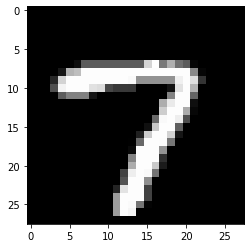

Prediction:  [7]
Label:  7


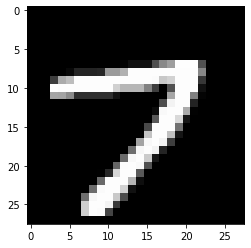

Prediction:  [8]
Label:  3


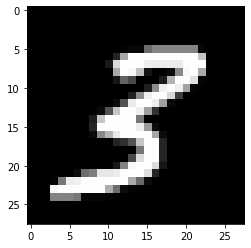

In [29]:
# test predict visually some cases
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)

## Metrics and evaluation

In [30]:
# first find the accuracy of the dev set
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

0.804

In [32]:
len(acc_history)

500

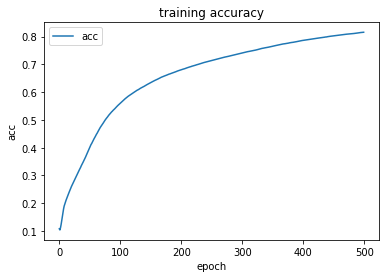

In [34]:
plt.plot(acc_history)
plt.title('training accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc'], loc='upper left')
plt.show()